In [6]:
# import pandas and sqlite3
import pandas as pd
import sqlite3
# connect to facebook.db
conn = sqlite3.connect("factbook.db")
# activate the cursor
cursor = conn.cursor()
# query looks at the database's tables
query = "select * from sqlite_master where type='table';"
# execute query and read it in pandas
database_info = pd.read_sql_query(query, conn)
database_info

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [7]:
query = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
res = pd.read_sql_query(query, conn)
res.head()

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [8]:
query_zeropop = "select name from facts where population == 0"
query_7bil = "select name from facts where population == 7256490011"
res1 = pd.read_sql_query(query_zeropop, conn)
res2 = pd.read_sql_query(query_7bil, conn)
print(res1)
print(res2)

         name
0  Antarctica
    name
0  World


In [9]:
# It has no sense to include Anctartica with a population equal to 0 
# and the whole world in our dataset!

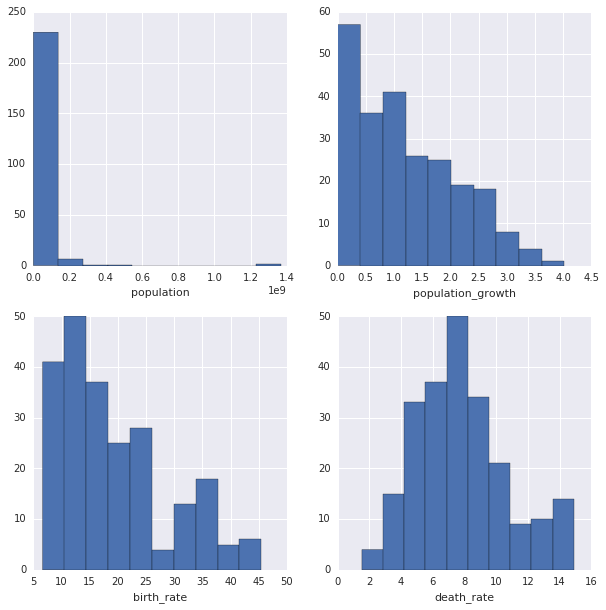

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
query_nolim = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MIN(population) from facts) AND population != (SELECT MAX(population) from facts)"
res = pd.read_sql_query(query_nolim, conn)
# generate a 2 by 2 grid of histograms
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
res["population"].hist(ax=ax1)
ax1.set_xlabel("population")
res["population_growth"].hist(ax=ax2)
ax2.set_xlabel("population_growth")
res["birth_rate"].hist(ax=ax3)
ax3.set_xlabel("birth_rate")
res["death_rate"].hist(ax=ax4)
ax4.set_xlabel("death_rate")
plt.show()

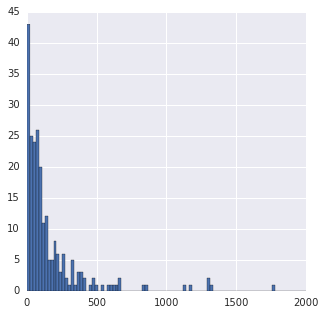

In [30]:
query_density = '''select name, cast(population as float)/cast(area as float) "density" from facts where population != (select min(population) from facts) and population != (select max(population) from facts) order by density desc'''
res_density = pd.read_sql_query(query_density, conn)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
res_density["density"].hist(bins=1000)
ax.set_xlim(0, 2000)
plt.show()